#Biblioteca

In [1]:
# Se necessário, instale o pacote skfuzzy
#!pip install networkx==2.5
!pip install scikit-fuzzy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 13.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894086 sha256=6c4f2c1219d63a29d8378fb01e45a4bce155e57a15fba0beb737c64a84d2e0a0
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


# Gindaste

In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Cria as variáveis do problema
Distancia = ctrl.Antecedent(np.arange(0, 10.1, 0.1), 'Distancia')
angulo = ctrl.Antecedent(np.arange(-45, +46, 0.1), 'angulo')
potencia = ctrl.Consequent(np.arange(0, 25.1, 0.1), 'potencia')


# Cria as funções de pertinência usando tipos variados
Distancia['longe_D'] = fuzz.gbellmf(Distancia.universe,  1.5 ,2 ,0)
Distancia['medio_D'] = fuzz.gaussmf(Distancia.universe, 5 ,1.5)
Distancia['perto_D'] = fuzz.gbellmf(Distancia.universe,  1.5 ,2 ,10)

angulo['negativo_A'] = fuzz.trapmf(angulo.universe,   [-69.98 ,-53.28 ,-36.68 ,-20.08])
angulo['zero_A'] = fuzz.trapmf(angulo.universe,  [-24.98 ,-8.29 ,8.31 ,25.01])
angulo['positivo_A'] = fuzz.trapmf(angulo.universe,  [19.96 ,36.66 ,53.36 ,69.96])

potencia['alta_P'] = fuzz.trimf(potencia.universe,   [0 ,5 ,10])
potencia['media_P'] = fuzz.trimf(potencia.universe,   [8 ,12.5 ,17])
potencia['baixa_P'] = fuzz.trimf(potencia.universe,   [15 ,20 ,25])


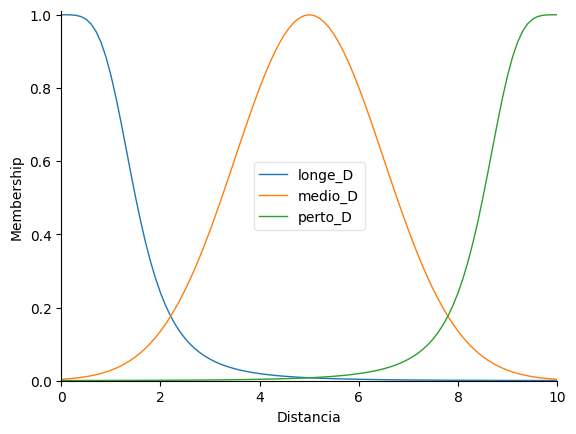

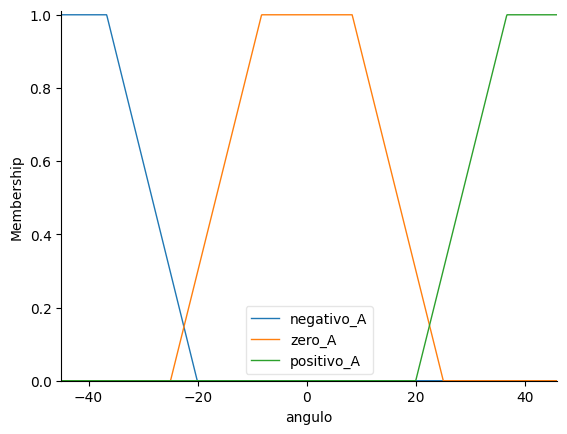

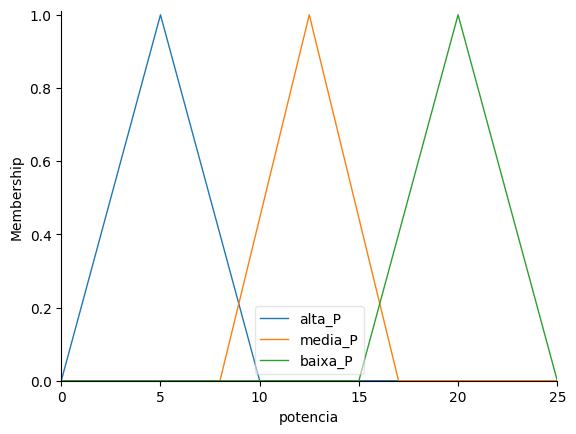

In [3]:
Distancia.view()
angulo.view()
potencia.view()

In [4]:
#Regras do Problema
rule1 = ctrl.Rule(Distancia['longe_D'] | angulo['negativo_A'], potencia['alta_P'])
rule2 = ctrl.Rule(Distancia['medio_D'], potencia['media_P'])
rule3 = ctrl.Rule(Distancia['perto_D'] | angulo['positivo_A'], potencia['baixa_P'])

16.128889925877605


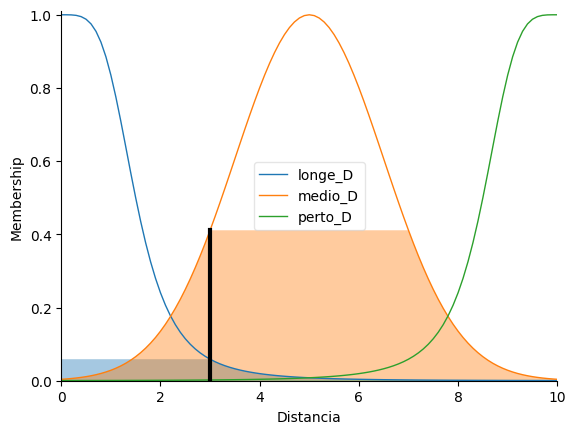

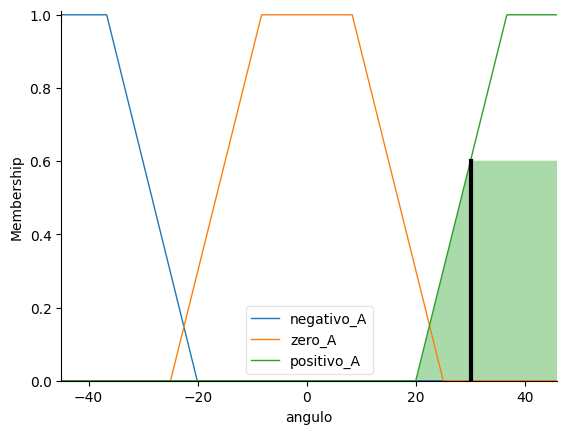

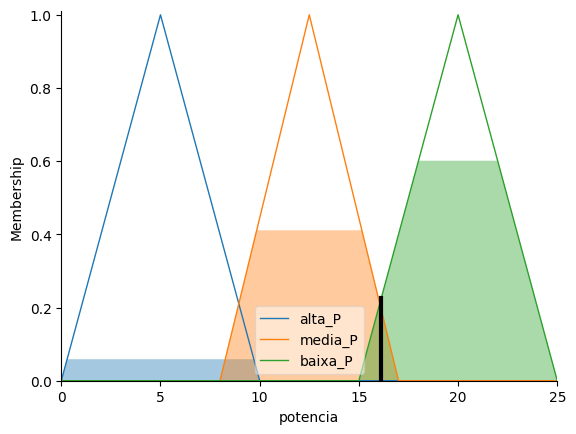

In [5]:
potencia_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
potencia_simulador = ctrl.ControlSystemSimulation(potencia_ctrl)

# Entrando com alguns valores Distancia(0 a 1o) e Angulo(-45 a +45)
potencia_simulador.input['Distancia'] = 3
potencia_simulador.input['angulo'] = +30

# Computando o resultado
potencia_simulador.compute()
print(potencia_simulador.output['potencia'])
Distancia.view(sim=potencia_simulador)
angulo.view(sim=potencia_simulador)
potencia.view(sim=potencia_simulador)

# Carro


In [6]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Cria as variáveis do problema
X = ctrl.Antecedent(np.arange(0, 100.1, 0.1), 'X')
O = ctrl.Antecedent(np.arange(-90, +270.1, 0.1), 'O')
O_Saida = ctrl.Consequent(np.arange(-30, 30.1, 0.1), 'O_Saida')


# Cria as funções de pertinência usando tipos variados
X['LE'] = fuzz.trapmf(X.universe, [-36 ,-4 ,20 ,33])
X['LC'] = fuzz.trimf(X.universe,  [10 ,35 ,48])
X['CE'] = fuzz.trimf(X.universe,   [33 ,48 ,62])
X['RC'] = fuzz.trimf(X.universe,    [48 ,58 ,88])
X['RI'] = fuzz.trapmf(X.universe,  [62 ,78 ,100.5 ,180.5])

O['RB'] = fuzz.trimf(O.universe,   [-95 ,-45 ,0])
O['RU'] = fuzz.trimf(O.universe,   [-45 ,0 ,45])
O['RV'] = fuzz.trimf(O.universe,   [0 ,52 ,90])
O['VE'] = fuzz.trimf(O.universe,   [45 ,90 ,135])
O['LV'] = fuzz.trimf(O.universe,   [90 ,115 ,180])
O['LU'] = fuzz.trimf(O.universe,   [135 ,180 ,225])
O['LB'] = fuzz.trimf(O.universe,   [180 ,225 ,280])

O_Saida['NB'] = fuzz.trimf(O_Saida.universe,   [-30 ,-30 ,-15])
O_Saida['NM'] = fuzz.trimf(O_Saida.universe,   [-25 ,-15 ,-5])
O_Saida['NS'] = fuzz.trimf(O_Saida.universe,   [-15 ,-5 ,0])
O_Saida['ZE'] = fuzz.trimf(O_Saida.universe,   [-5 ,0 ,5])
O_Saida['PS'] = fuzz.trimf(O_Saida.universe,   [0 ,5 ,15])
O_Saida['PM'] = fuzz.trimf(O_Saida.universe,   [5 ,15 ,25])
O_Saida['PB'] = fuzz.trimf(O_Saida.universe,   [15 ,30 ,30])

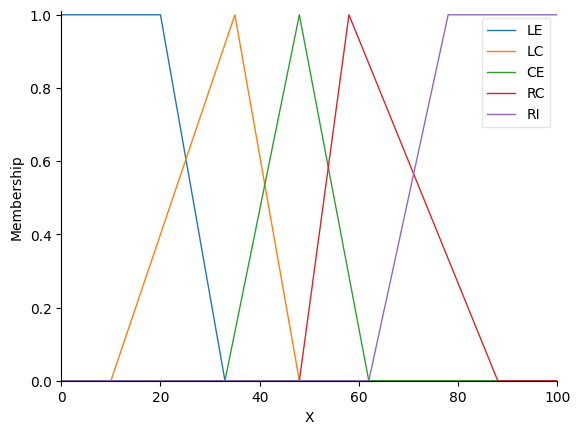

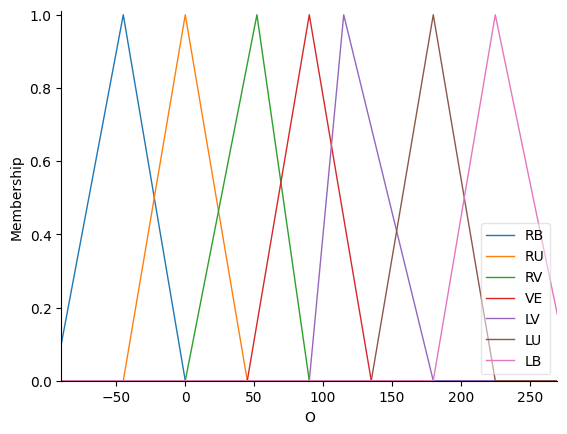

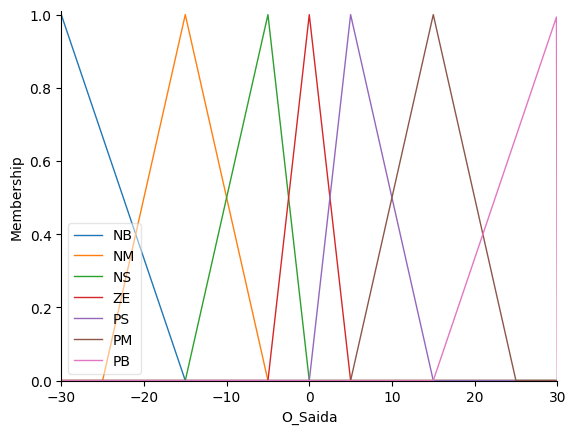

In [7]:
X.view()
O.view()
O_Saida.view()

In [8]:
#regras do problema
rule1 = ctrl.Rule(X['LE']& O['RB'], O_Saida['PS'])
rule2 = ctrl.Rule(X['LE']& O['RU'], O_Saida['NS'])
rule3 = ctrl.Rule(X['LE']& O['RV'], O_Saida['NM'])
rule4 = ctrl.Rule(X['LE']& O['VE'], O_Saida['NM'])
rule5 = ctrl.Rule(X['LE']& O['LV'], O_Saida['NB'])
rule6 = ctrl.Rule(X['LE']& O['LU'], O_Saida['NB'])
rule7 = ctrl.Rule(X['LE']& O['LB'], O_Saida['NB'])

rule8 = ctrl.Rule(X['LC']& O['RB'], O_Saida['PM'])
rule9 = ctrl.Rule(X['LC']& O['RU'], O_Saida['PS'])
rule10 = ctrl.Rule(X['LC']& O['RV'], O_Saida['NS'])
rule11 = ctrl.Rule(X['LC']& O['VE'], O_Saida['NM'])
rule12 = ctrl.Rule(X['LC']& O['LV'], O_Saida['NM'])
rule13 = ctrl.Rule(X['LC']& O['LU'], O_Saida['NB'])
rule14 = ctrl.Rule(X['LC']& O['LB'], O_Saida['NB'])

rule15 = ctrl.Rule(X['CE']& O['RB'], O_Saida['PM'])
rule16 = ctrl.Rule(X['CE']& O['RU'], O_Saida['PM'])
rule17 = ctrl.Rule(X['CE']& O['RV'], O_Saida['PS'])
rule18 = ctrl.Rule(X['CE']& O['VE'], O_Saida['ZE'])
rule19 = ctrl.Rule(X['CE']& O['LV'], O_Saida['NS'])
rule20 = ctrl.Rule(X['CE']& O['LU'], O_Saida['NM'])
rule21 = ctrl.Rule(X['CE']& O['LB'], O_Saida['NM'])

rule22 = ctrl.Rule(X['RC']& O['RB'], O_Saida['PB'])
rule23 = ctrl.Rule(X['RC']& O['RU'], O_Saida['PB'])
rule24 = ctrl.Rule(X['RC']& O['RV'], O_Saida['PM'])
rule25 = ctrl.Rule(X['RC']& O['VE'], O_Saida['PM'])
rule26 = ctrl.Rule(X['RC']& O['LV'], O_Saida['PS'])
rule27 = ctrl.Rule(X['RC']& O['LU'], O_Saida['NS'])
rule28 = ctrl.Rule(X['RC']& O['LB'], O_Saida['NM'])

rule29 = ctrl.Rule(X['RI']& O['RB'], O_Saida['PB'])
rule30 = ctrl.Rule(X['RI']& O['RU'], O_Saida['PB'])
rule31 = ctrl.Rule(X['RI']& O['RV'], O_Saida['PB'])
rule32 = ctrl.Rule(X['RI']& O['VE'], O_Saida['PM'])
rule33 = ctrl.Rule(X['RI']& O['LV'], O_Saida['PM'])
rule34 = ctrl.Rule(X['RI']& O['LU'], O_Saida['PS'])
rule35 = ctrl.Rule(X['RI']& O['LB'], O_Saida['NS'])


11.153626950707539


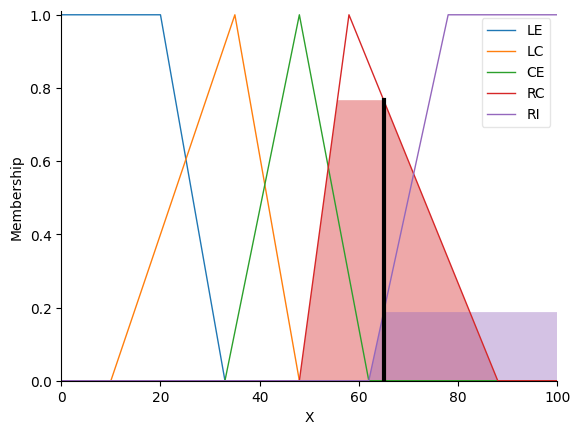

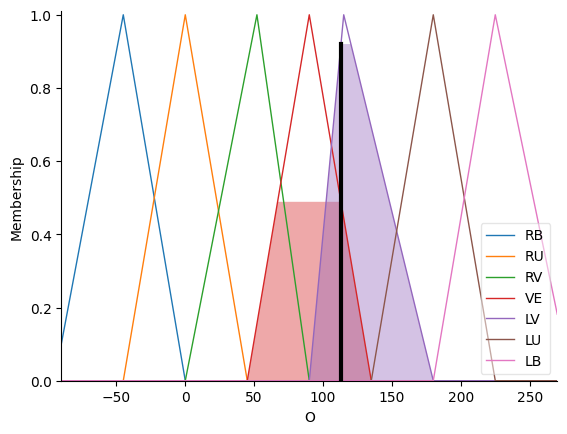

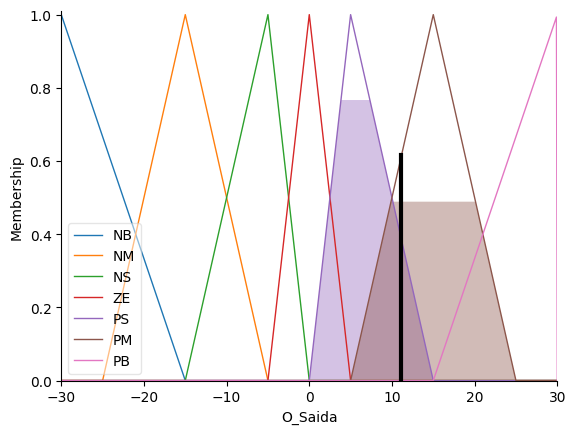

In [9]:
O_Saida_ctrl = ctrl.ControlSystem([rule1, rule2, rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25,rule26,rule27,rule28,rule29,rule30,rule31,rule33,rule33,rule34,rule35])
O_Saida_simulador = ctrl.ControlSystemSimulation(O_Saida_ctrl)

# Entrando com alguns valores
O_Saida_simulador.input['X'] = 65 #(0 ate 100)
O_Saida_simulador.input['O'] = 113 #(-90 ate 270)

# Computando o resultado
O_Saida_simulador.compute()
print(O_Saida_simulador.output['O_Saida'])
X.view(sim=O_Saida_simulador)
O.view(sim=O_Saida_simulador)

O_Saida.view(sim=O_Saida_simulador)